# **Introduction to Classification with `sklearn`**

This Python notebook provides an introduction to classification using the `sklearn` library. It uses the popular Iris dataset ([link](https://en.wikipedia.org/wiki/Iris_flower_data_set)) for demonstration purposes.

# **Importing Libraries**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# **Loading the Dataset**

In [ ]:
# Load the Iris dataset from a URL
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
data = pd.read_csv(url)

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We will use only 2 features (**petal_length** and **petal_width**) to ease the visualization process. But before that ....

# **Split the dataset to *train*, *validation* and *test* sets**

Before visualizing the data it is very important to split the dataset into *train*, *validation* and *test* sets. The reason for doing this is that in a real world scenario we should be making the predictions on the **unseen test set**. Therefore, the test dataset should not be visualized or used in any way before the model is trained.

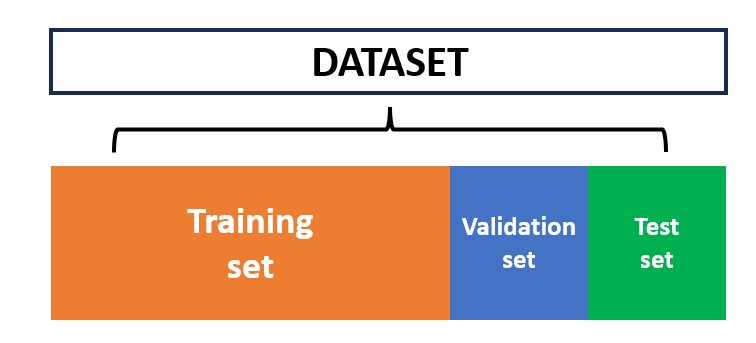


# **Visualizing the Training Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.loc[:, ['petal_length', 'petal_width']] # selecting only 2 dimensions for visualization

output_classes = data['species'].unique().tolist()


y = pd.factorize(data['species'])[0] # Convert the 'species' column to numerical values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(96, 2)
(96,)
(24, 2)
(24,)
(30, 2)
(30,)


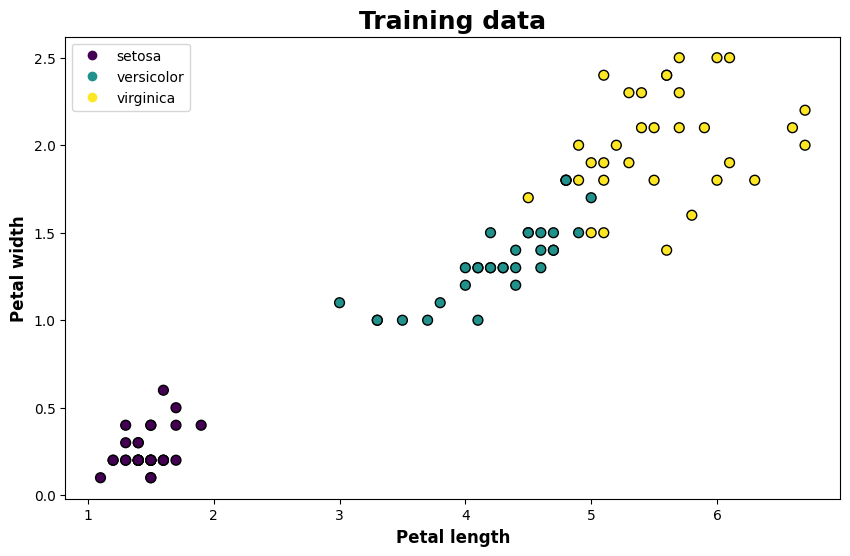

In [ ]:
colors = pd.factorize(y_train)[0] # converting categories into numerical

# Create subplots for two scatter plots
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of petal length vs petal width
scatter2 = ax.scatter(X_train['petal_length'], X_train['petal_width'], c=y_train, edgecolor="k", s=50)
ax.legend(handles=scatter2.legend_elements()[0], labels=output_classes)
ax.set_xlabel("Petal length", fontsize=12, fontweight='bold')
ax.set_ylabel("Petal width", fontsize=12, fontweight='bold')
ax.set_title('Training data',  fontsize=18, fontweight='bold')
# Show the plot
plt.show()

# **Training a Logistic Regression Model**

More details about ```sklearn``` ```Logistic Regression``` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

While training a machine learning model we need to tune several hyperparameters and then choose the best performing model. We should not use the test data for this. Rather we use the validation data for hypertuning/model selection.

In [ ]:
# Train 2 different logistic regression models
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(random_state=42).fit(X_train, y_train) # Logistic Regression with default regularization strength C=1.0

clf2 = LogisticRegression(random_state=42, C=0.1).fit(X_train, y_train) # Logistic Regression with regularization strength C=0.1

# **Visualise decision boundaries**

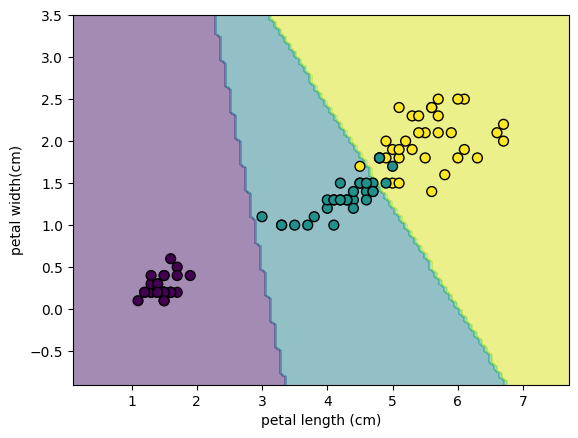

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(clf2, X_train, response_method="predict",
xlabel='petal length (cm)', ylabel='petal width(cm)',
alpha=0.5)

disp.ax_.scatter(X_train['petal_length'], X_train['petal_width'], c=y_train, edgecolor="k", s=50)

# **Making Predictions and Evaluating the Model**

\begin{equation}
Accuracy = \frac{\textrm{No. of correct predictions}}{\textrm{Total no. of predictions}}
\end{equation}

## Model 1

In [ ]:
y_pred_train1 = clf1.predict(X_train)
y_pred_val1 = clf1.predict(X_val)

acc_train1 = (y_pred_train1 == y_train).sum() / len(y_train)
acc_val1 = (y_pred_val1 == y_val).sum() / len(y_val)

print('Accuracy on Training set = {:.2f} %'.format(acc_train1 * 100))
print('\n')
print('Accuracy on Validation set = {:.2f} %'.format(acc_val1 * 100))

Accuracy on Training set = 96.88 %


Accuracy on Validation set = 95.83 %


# Model 2

In [ ]:
y_pred_train2 = clf2.predict(X_train)
y_pred_val2 = clf2.predict(X_val)

acc_train2 = (y_pred_train2 == y_train).sum() / len(y_train)
acc_val2 = (y_pred_val2 == y_val).sum() / len(y_val)

print('Accuracy on Training set = {:.2f} %'.format(acc_train2 * 100))
print('\n')
print('Accuracy on Validation set = {:.2f} %'.format(acc_val2 * 100))

Accuracy on Training set = 95.83 %


Accuracy on Validation set = 91.67 %


## Model selection and prediction on test set
**Which model performs better?**

In [ ]:
# Make predictions on the test set
y_pred = clf1.predict(X_test)

# Calculate and print the accuracy
acc_test = (y_pred == y_test).sum() / len(y_test)
print('Accuracy on Test set = {:.2f} %'.format(acc_test * 100))



Accuracy on Test set = 100.00 %


# **Confusion Matrices**

## Training data

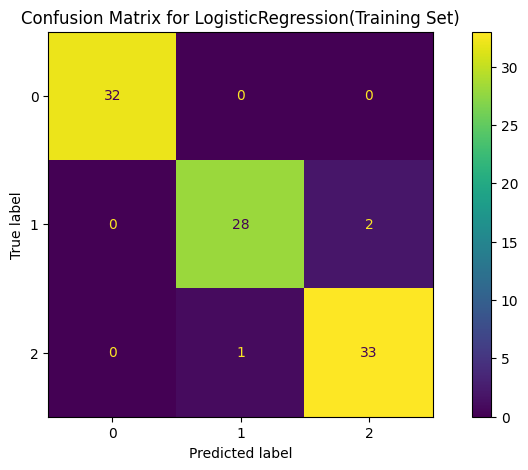

In [ ]:
# Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train1, ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for {clf1.__class__.__name__}(Training Set)")

## Validation data

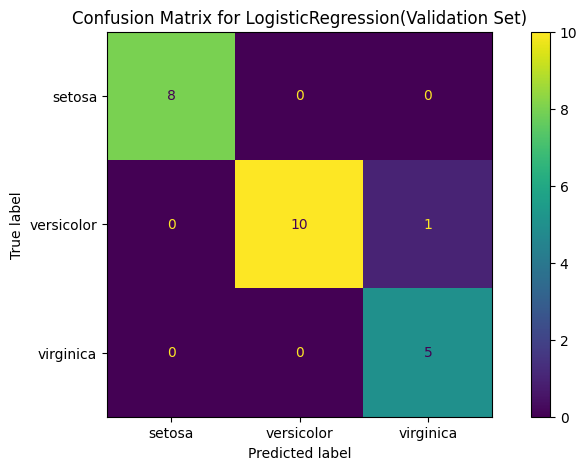

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val1, ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for {clf1.__class__.__name__}(Validation Set)")

## Test data

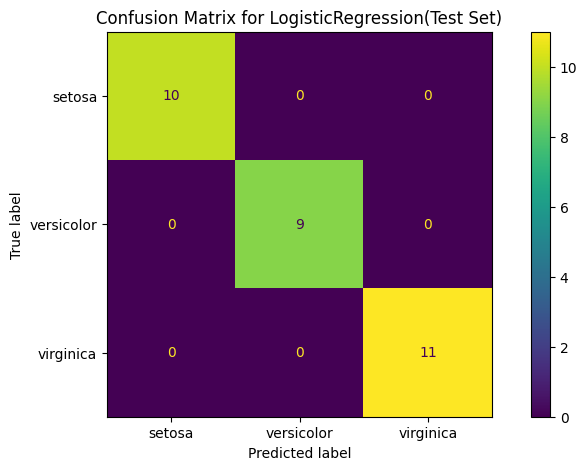

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(output_classes)
ax.yaxis.set_ticklabels(output_classes)
_ = ax.set_title(f"Confusion Matrix for {clf1.__class__.__name__}(Test Set)")